In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/domino/datasets/local/wine-data/winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
for col in df.columns:
    df.rename({col: col.replace(' ', '-')}, axis =1, inplace = True)

In [4]:
na_values = df.isna().sum()
na_values = na_values[na_values>0]
na_values

fixed-acidity       10
volatile-acidity     8
citric-acid          3
residual-sugar       2
chlorides            2
pH                   9
sulphates            4
dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

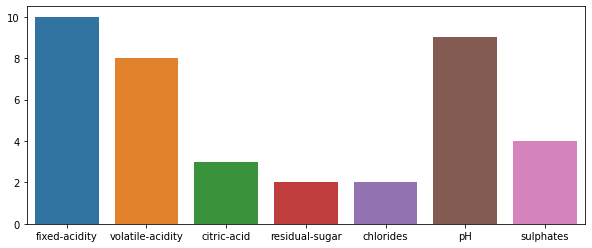

In [5]:
fig = plt.figure(figsize=(10,4))
sns.barplot(na_values.keys(), na_values.values)

<AxesSubplot:>

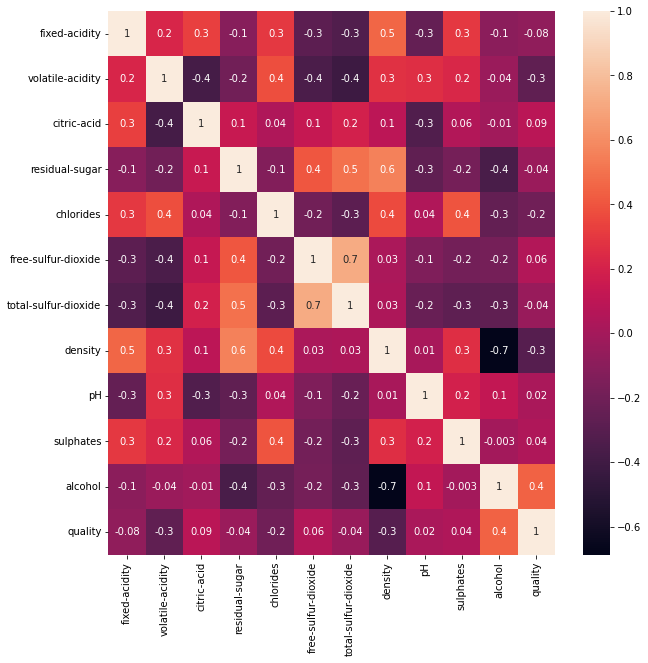

In [12]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, fmt='.1g')

In [13]:
corr_values = df.corr().sort_values(by = 'quality')['quality'].drop('quality',axis=0)

In [14]:
corr_values

density                -0.305858
volatile-acidity       -0.265953
chlorides              -0.200886
fixed-acidity          -0.077031
total-sulfur-dioxide   -0.041385
residual-sugar         -0.036825
pH                      0.019366
sulphates               0.038729
free-sulfur-dioxide     0.055463
citric-acid             0.085706
alcohol                 0.444319
Name: quality, dtype: float64

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

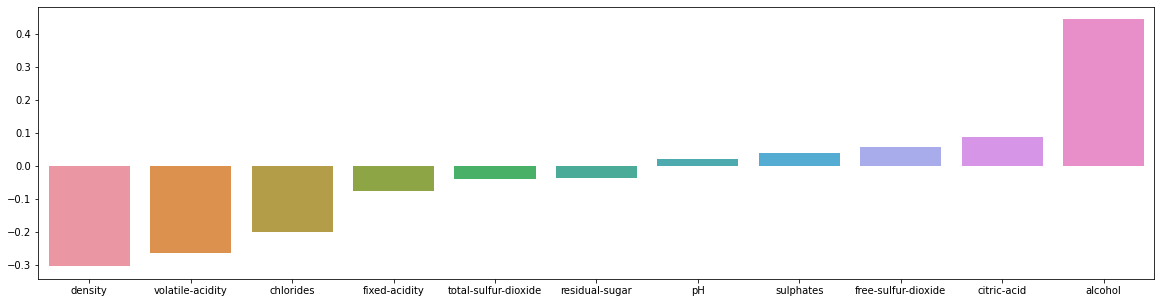

In [15]:
plt.figure(figsize=(20,5))
sns.barplot(corr_values.keys(), corr_values.values)

In [10]:
!pip install featuretools --user

     |████████████████████████████████| 339 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 830 kB 109.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 106.2 MB/s eta 0:00:01
     |████████████████████████████████| 160 kB 118.9 MB/s eta 0:00:01


In [11]:
import featuretools as ft

In [12]:
df.columns

Index(['type', 'fixed-acidity', 'volatile-acidity', 'citric-acid',
       'residual-sugar', 'chlorides', 'free-sulfur-dioxide',
       'total-sulfur-dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [13]:
df_fs =ft.selection.remove_highly_correlated_features(df, pct_corr_threshold=.65)

In [14]:
df_fs =ft.selection.remove_low_information_features(df_fs)

In [15]:
df_fs.columns

Index(['type', 'fixed-acidity', 'volatile-acidity', 'citric-acid',
       'residual-sugar', 'chlorides', 'free-sulfur-dioxide', 'density', 'pH',
       'sulphates', 'quality'],
      dtype='object')

In [16]:
set(df.columns)-set(df_fs.columns)

{'alcohol', 'total-sulfur-dioxide'}

In [17]:
df_fs.corr()['quality']

fixed-acidity         -0.077031
volatile-acidity      -0.265953
citric-acid            0.085706
residual-sugar        -0.036825
chlorides             -0.200886
free-sulfur-dioxide    0.055463
density               -0.305858
pH                     0.019366
sulphates              0.038729
quality                1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='Count'>

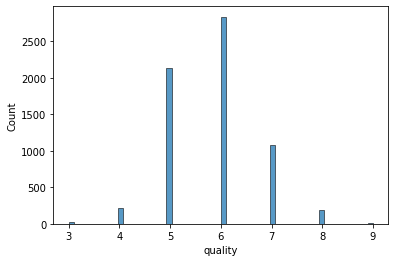

In [18]:
sns.histplot(df.quality)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm_data = df.dropna(how='any',axis=0)
x = lm_data.drop(['quality','type'], axis=1)
y = lm_data['quality'].astype('float64')

In [21]:
x.dtypes

fixed-acidity           float64
volatile-acidity        float64
citric-acid             float64
residual-sugar          float64
chlorides               float64
free-sulfur-dioxide     float64
total-sulfur-dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [22]:
y.dtypes

dtype('float64')

In [23]:
x.isna().sum()

fixed-acidity           0
volatile-acidity        0
citric-acid             0
residual-sugar          0
chlorides               0
free-sulfur-dioxide     0
total-sulfur-dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [24]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [26]:
from sklearn.metrics import accuracy_score, r2_score
preds = lm.predict(x)
preds.dtype
print(r2_score(y, preds))


0.29316397364863245


In [184]:
!pip install h2o --user

     |████████████████████████████████| 176.0 MB 10 kB/s /s eta 0:00:01
     |████████████████████████████████| 829 kB 99.4 MB/s eta 0:00:01
  Created wheel for h2o: filename=h2o-3.36.0.2-py2.py3-none-any.whl size=176112128 sha256=7c76000f591826e8eae21083266288058ef6260b67c91c5eb539e037d33f10f0
  Stored in directory: /home/ubuntu/.cache/pip/wheels/51/21/0c/746203762bf4493f01425b6574f85c2099881fa59228074d14
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=986174e05a6ab8f584130057088d405b4dd822eb731624cce9a23d7812aca689
  Stored in directory: /home/ubuntu/.cache/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built h2o future


In [27]:
import h2o

ModuleNotFoundError: No module named 'h2o'